In [1]:
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
df = pd.read_csv('./data/Resume.csv')
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [3]:
df.drop("Resume_html", axis=1, inplace=True)

Text(0.5, 1.0, 'Frequency distribution of Resumes')

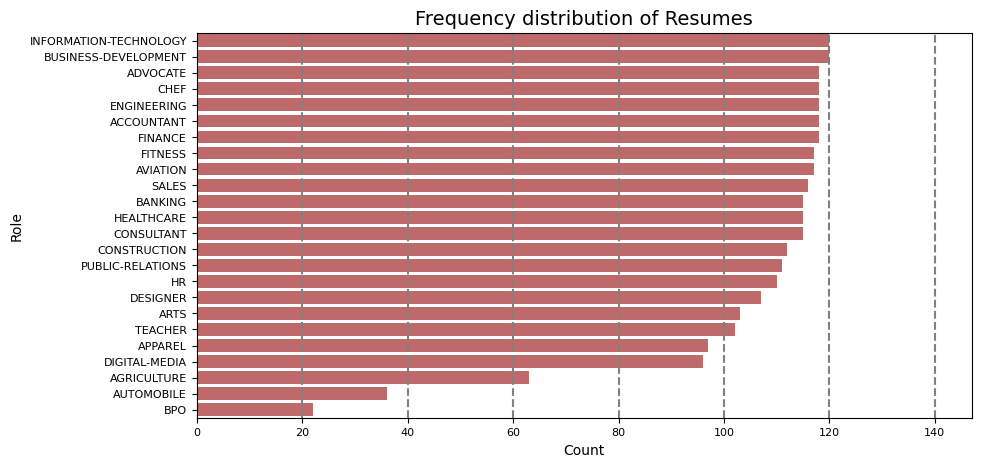

In [4]:
fig, ax = plt.subplots(figsize=(10,5))
freq = pd.DataFrame(df['Category'].value_counts())
sns.barplot(data=freq, y='Category', x='count', color='indianred', ax=ax)
ax.tick_params(which='major', axis='both', labelsize=8)
for tick in ax.get_xticks():
    ax.axvline(tick, color="gray", linestyle="--")
ax.set_xlabel("Count", fontsize=10)
ax.set_ylabel("Role", fontsize=10)
ax.set_title("Frequency distribution of Resumes", fontsize=14)

In [5]:
nlp = spacy.load("en_core_web_sm")

In [6]:
def clean_text(text):
    doc = nlp(text)
    tokens = [
        token.text.strip() for token in doc
        if not token.is_stop and not token.is_punct
    ]
    return " ".join(tokens)

In [7]:
text = clean_text(df["Resume_str"][0])

In [8]:
doc = nlp(text)

In [9]:
for ent in doc.ents:
    print(ent.text, ent.label_)

15 + years DATE
Hospitality Customer Service Management  Respected ORG
Highlights  Focused PERSON
Team ORG
Missouri GPE
DOT ORG
Training Certification PERSON
Hilton OnQ PERSON
Micros  Opera ORG
Fidelio PRODUCT
Dec 2013    DATE
Prepares NORP
Keeps ORG
Assisted ORG
2 months DATE
Created ORG
Advanced Medical ORG
2012 DATE
Dec 2013  Company   City   State  Reviewed DATE
CPT ORG
2010 DATE
Dec 2010 DATE
Established ORG
daily DATE
Marketing Advertising ORG
Chamber Commerce  Executive Support Marketing ORG
2010 DATE
Executive Marketing Customer Service Human Resources  Managed ORG
second ORDINAL
Reservation Office ORG
2004 DATE
Dec 2001   2004 DATE
1999 DATE
Dec 2001 DATE
N   Business Administration ORG
1999 DATE
Jefferson College   City   State  Business Administration  Marketing Advertising  High School ORG
1998 DATE
American Shrubel Leadership Scholarship Jefferson College  Skills  Accounting WORK_OF_ART
Customer Service ORG
Human Resources ORG


In [10]:
skill_patterns = []
with open("./data/jz_skill_patterns.jsonl") as file:
    for line in file:
        skill_patterns.append(json.loads(line))

In [11]:
skill_patterns[:5]

[{'label': 'SKILL', 'pattern': [{'TEXT': '.NET'}]},
 {'label': 'SKILL', 'pattern': [{'LOWER': ''}, {'LOWER': 'net'}]},
 {'label': 'SKILL', 'pattern': [{'LOWER': '1password'}]},
 {'label': 'SKILL', 'pattern': [{'TEXT': '3D'}]},
 {'label': 'SKILL', 'pattern': [{'LOWER': '3d'}, {'LOWER': 'reconstruction'}]}]

In [12]:
ruler = nlp.add_pipe("entity_ruler", before="ner")

In [13]:
ruler.add_patterns(skill_patterns)

In [14]:
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'entity_ruler',
 'ner']

In [15]:
displacy.render(nlp(text), style="ent", jupyter=True)

In [56]:
from collections import Counter

role = "INFORMATION-TECHNOLOGY"
# role="BUSINESS-DEVELOPMENT"
subset = df[df['Category'] == role]
counter = Counter()

for i, row in subset.iterrows():
    doc = nlp(row['Resume_str'])
    skills = [ent.text.lower() for ent in doc.ents if ent.label_ == "SKILL"]
    counter += Counter(skills)

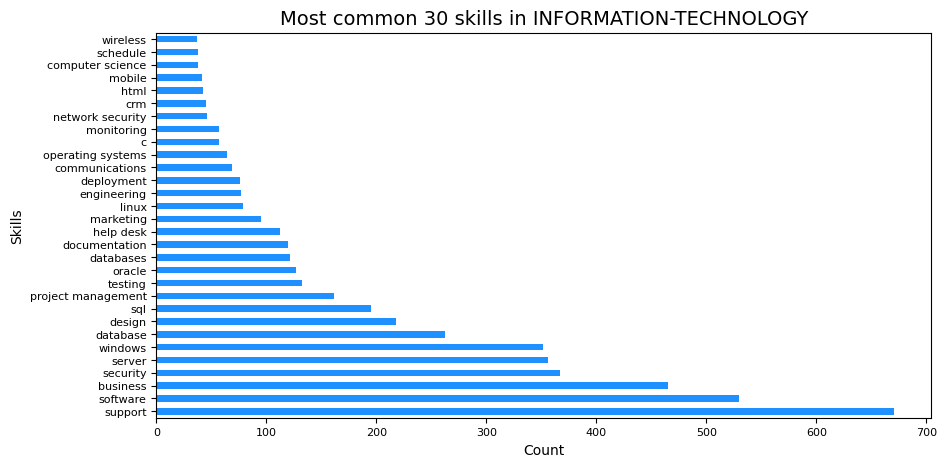

In [57]:
ax = pd.DataFrame(counter, index=["Count"]).T.sort_values(by="Count", ascending=False).head(30).plot(
    kind="barh", 
    color="dodgerblue", 
    figsize=(10,5)
)
ax.set_xlabel("Count", fontsize=10)
ax.set_ylabel("Skills", fontsize=10)
ax.tick_params(which="major", axis="both", labelsize=8)
ax.set_title(f"Most common 30 skills in {role}", fontsize=14)
ax.get_legend().remove()

In [58]:
nlp.to_disk("spacy_model")